## Analiza sprzedaży mieszkań

### 1. Przegląd danych 

In [1]:
#zaimportowanie potrzebnych bibliotek 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

In [2]:
#wczytanie danych
df = pd.read_csv("Sacramento_real_estate_transactions.csv")
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [4]:
#podstawowe statystyki (średnia, odchylenie standardowe, minimum, maximum, kwartyle)
df.describe() 

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [5]:
#podstawowe statystyki zmiennej zależnej, jaką jest cena 
df['price'].describe()

count       985.000000
mean     234144.263959
std      138365.839085
min        1551.000000
25%      145000.000000
50%      213750.000000
75%      300000.000000
max      884790.000000
Name: price, dtype: float64

In [6]:
df['city'].unique() #sprawdzenie miast -> w danych wystąpiło miasto West Sacramento, które można przypisać do miasta Sacramento
df['city'] = df['city'].replace('WEST SACRAMENTO', 'SACRAMENTO') 
df['city'].unique()

array(['SACRAMENTO', 'RANCHO CORDOVA', 'RIO LINDA', 'CITRUS HEIGHTS',
       'NORTH HIGHLANDS', 'ANTELOPE', 'ELK GROVE', 'ELVERTA', 'GALT',
       'CARMICHAEL', 'ORANGEVALE', 'FOLSOM', 'MATHER', 'POLLOCK PINES',
       'GOLD RIVER', 'EL DORADO HILLS', 'RANCHO MURIETA', 'WILTON',
       'GREENWOOD', 'FAIR OAKS', 'CAMERON PARK', 'LINCOLN', 'PLACERVILLE',
       'MEADOW VISTA', 'ROSEVILLE', 'ROCKLIN', 'AUBURN', 'LOOMIS',
       'EL DORADO', 'PENRYN', 'GRANITE BAY', 'FORESTHILL',
       'DIAMOND SPRINGS', 'SHINGLE SPRINGS', 'COOL', 'WALNUT GROVE',
       'GARDEN VALLEY', 'SLOUGHHOUSE'], dtype=object)

In [7]:
#określenie minimalnej daty sprzedaży mieszkania 
df['sale_date'].min()

'Fri May 16 00:00:00 EDT 2008'

In [8]:
#określenie maksymalnej daty sprzedaży mieszkania 
df['sale_date'].max()

'Wed May 21 00:00:00 EDT 2008'

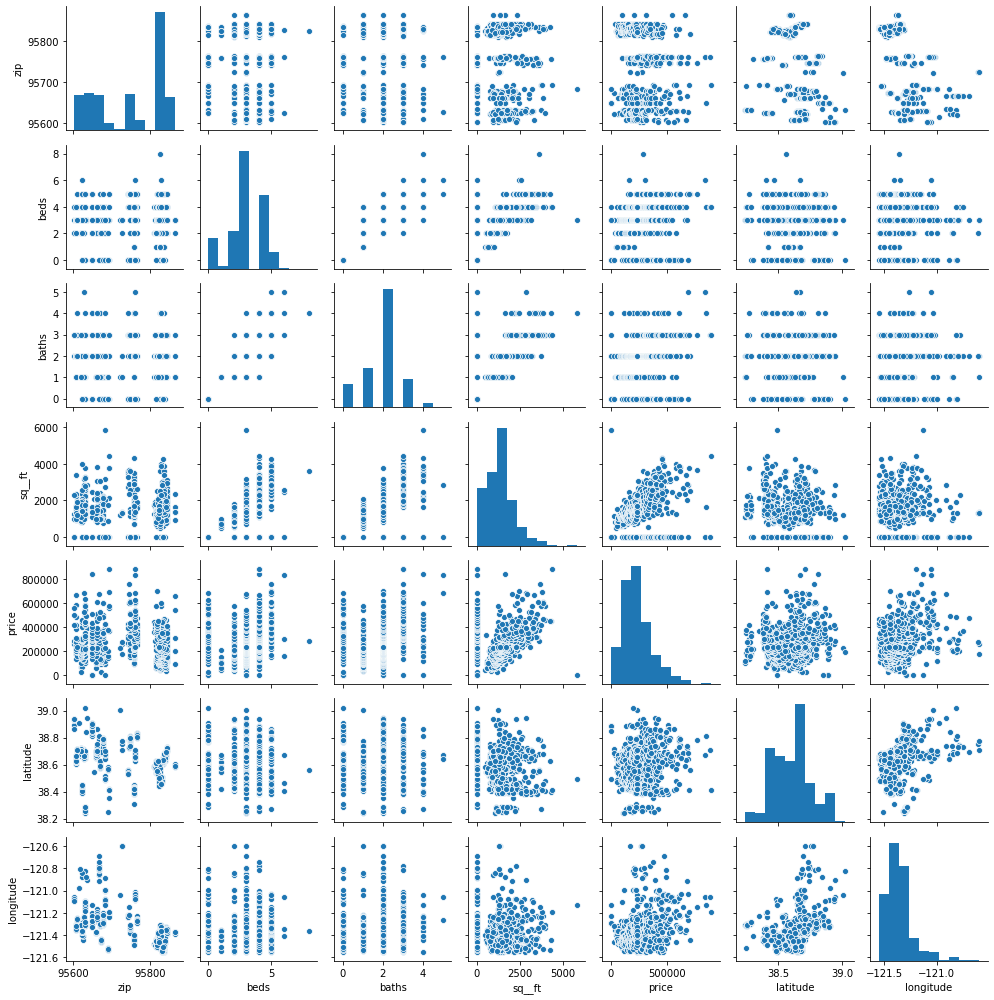

In [9]:
#podstawowy wykres pairplot
%matplotlib inline
sns.pairplot(df, height=2)
plt.tight_layout()

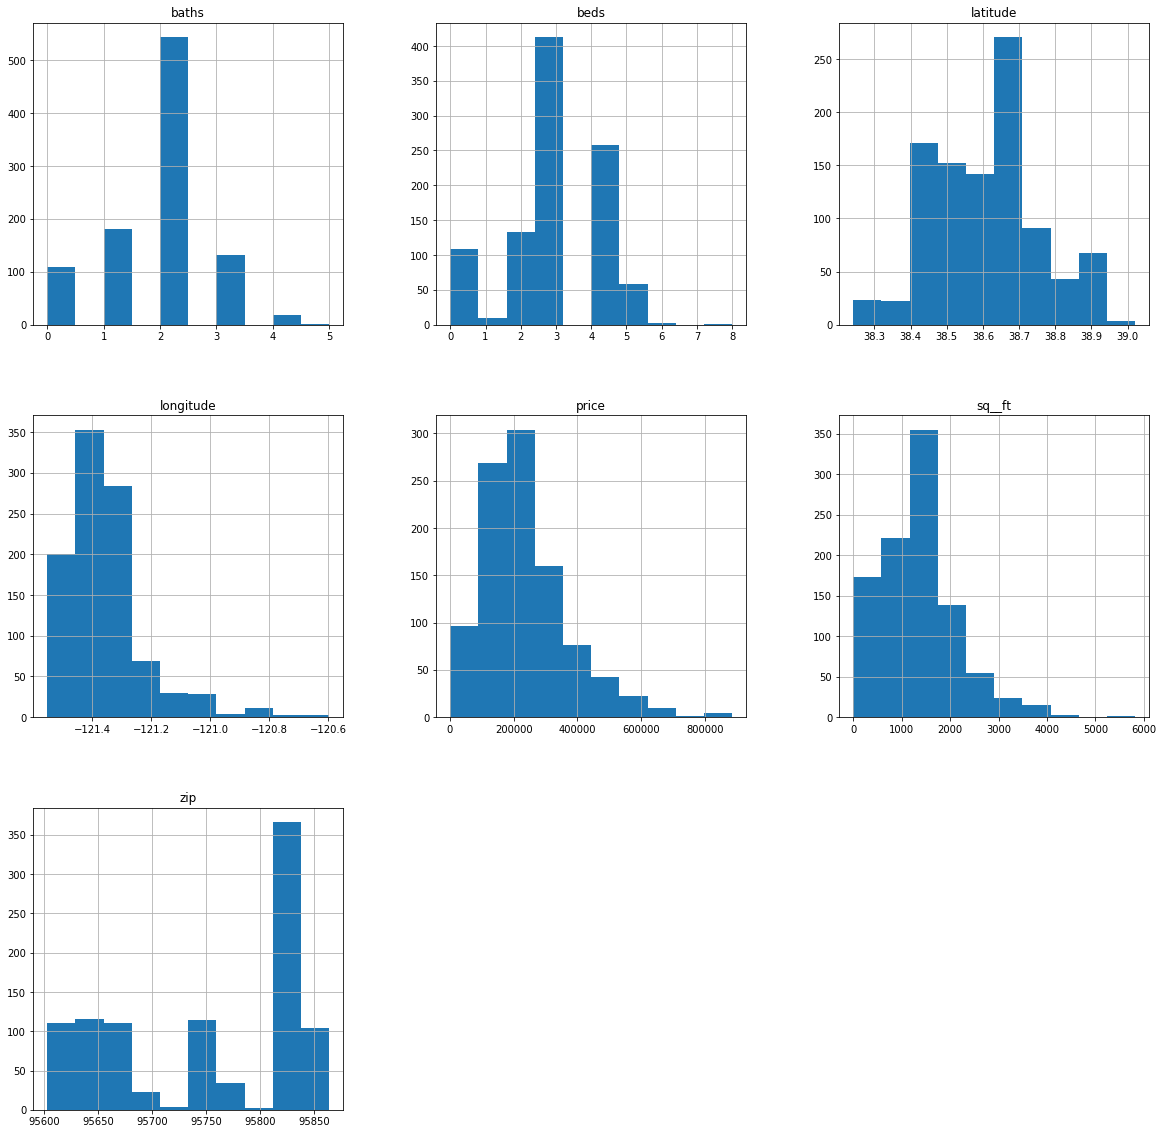

In [10]:
#histogramy poszczególnych zmiennych -> jak widać zmienne takie jak 'baths', 'beds', 'price' zawierają obserwacje z zerami
#co trzeba będzie uwzględnić przy czyszczeniu danych
%matplotlib inline
p=df.hist(figsize=(20,20))

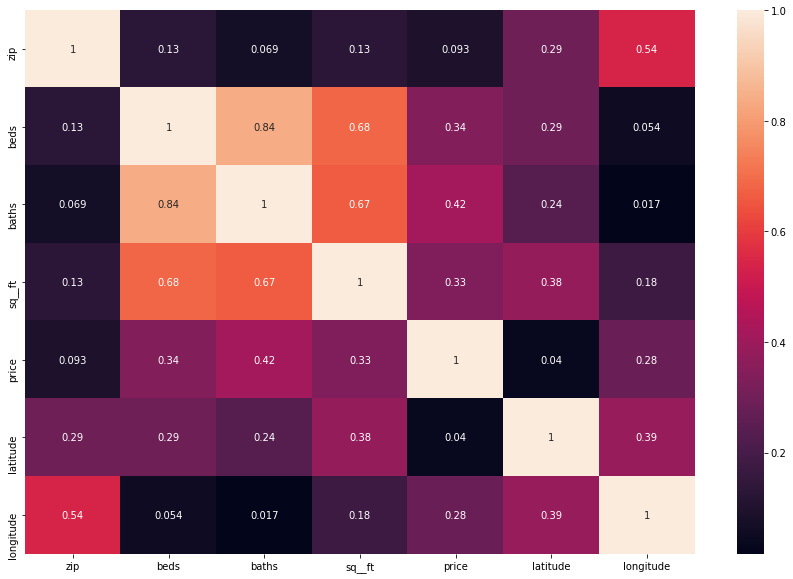

In [11]:
#wykres korelacji Pearsona -> sprawdzenie, czy między zmiennymi występują wysokie korelacje -> jak widać największa korelacja
#istnieje pomiędzy 'bath' i 'beds' i jest równa 0,84. Nie jest to na tyle silna korelacja, żebyśmy musieli rezygnować z tych zmiennych. 
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr().abs(),  annot=True)

### 2. Czyszczenie danych, outliers 

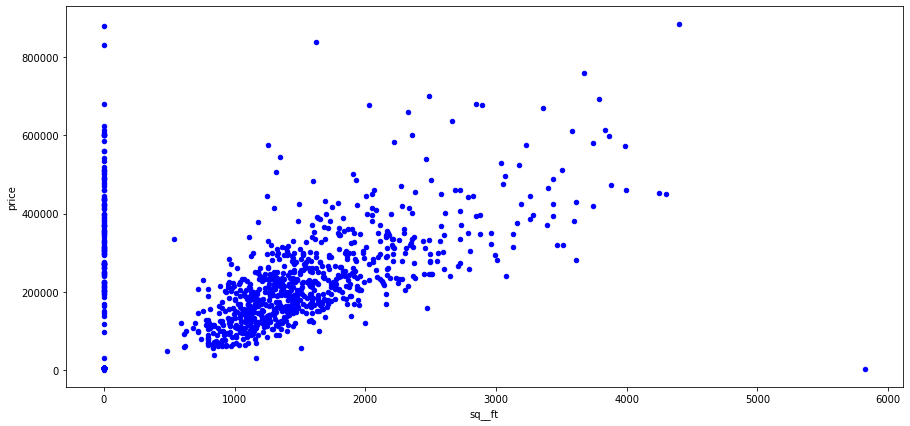

In [12]:
#na wykresie widać sporo obserwacji 'sq__ft', które mają przypisaną wartość 0
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15, 7))
axes = np.ravel(axes)
col_name = ['sq__ft']
for i, c in zip(range(5), col_name):
    df.plot.scatter(ax=axes[i], x=c, y='price', sharey=True, colorbar=False, c='b')

In [13]:
(df.sq__ft == 0).sum()

171

In [14]:
(df.type == 0).sum()

0

In [15]:
(df.price == 0).sum()

0

In [16]:
#usunięcie danych, gdzie wartość zmiennej 'sq__ft' jest równa 0 
df = df[df.sq__ft != 0]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 984
Data columns (total 12 columns):
street       814 non-null object
city         814 non-null object
zip          814 non-null int64
state        814 non-null object
beds         814 non-null int64
baths        814 non-null int64
sq__ft       814 non-null int64
type         814 non-null object
sale_date    814 non-null object
price        814 non-null int64
latitude     814 non-null float64
longitude    814 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


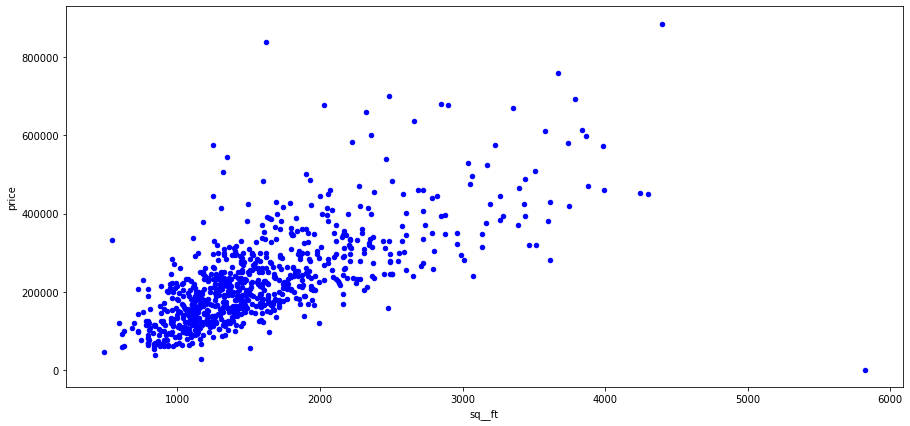

In [18]:
#sprawdzenie wartości odstających 
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15, 7))
axes = np.ravel(axes)
col_name = ['sq__ft']
for i, c in zip(range(5), col_name):
    df.plot.scatter(ax=axes[i], x=c, y='price', sharey=True, colorbar=False, c='b')

In [19]:
#usunięcie outlierów 
df = df[df.sq__ft < 5000]
df = df[df.price < 800000]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 0 to 984
Data columns (total 12 columns):
street       811 non-null object
city         811 non-null object
zip          811 non-null int64
state        811 non-null object
beds         811 non-null int64
baths        811 non-null int64
sq__ft       811 non-null int64
type         811 non-null object
sale_date    811 non-null object
price        811 non-null int64
latitude     811 non-null float64
longitude    811 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 82.4+ KB


### 3. Przegląd danych po czyszczeniu

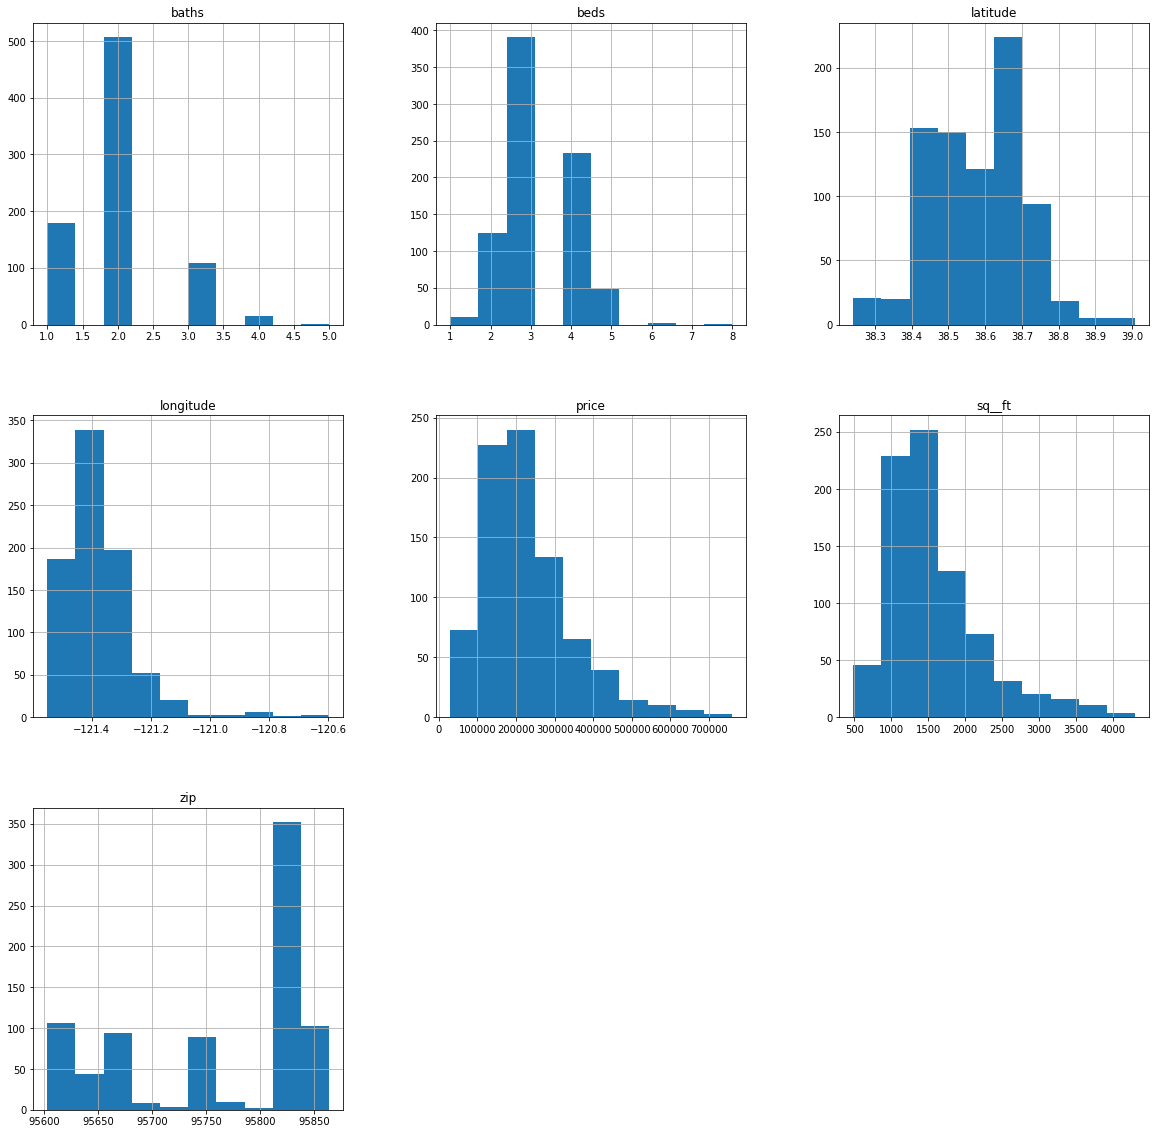

In [21]:
#histogramy po czyszczeniu danych -> wśród występujących zmiennych jest brak wartości 0 
%matplotlib inline
p=df.hist(figsize=(20,20))

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

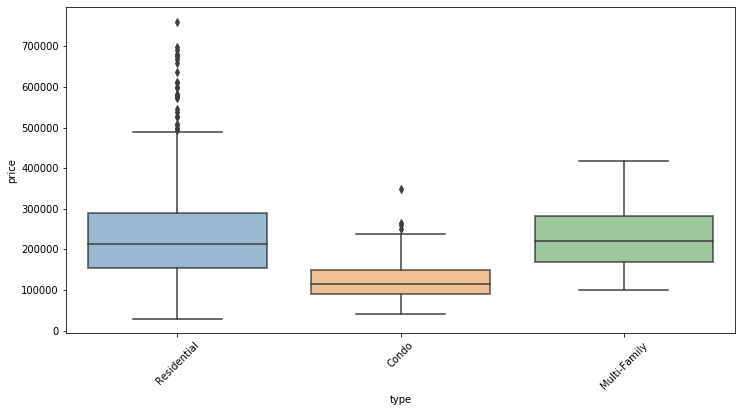

In [22]:
#ceny mieszkań na dany rodzaj mieszkania
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='type', y='price', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

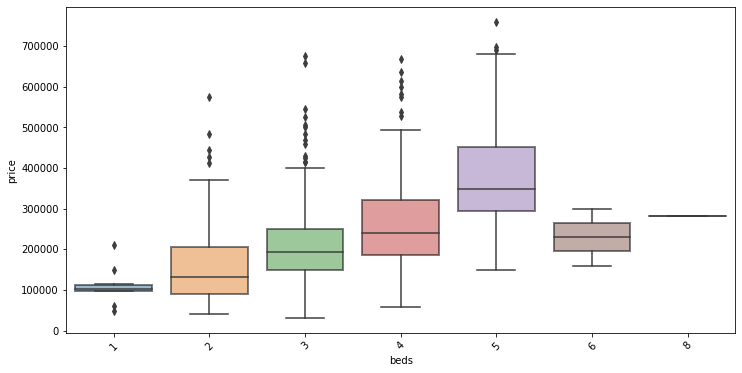

In [23]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='beds', y='price', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [24]:
#zamiana zmiennych kategorycznych na numeryczne (nie zamieniam zmiennej 'street', ponieważ 
#nie będę jej brała pod uwagę przy tworzeniu modeli oraz zmiennej 'state', ponieważ dane są tylko ze stanu Kalifornia)
from sklearn.preprocessing import LabelEncoder
listToEncode = ['city', 'type']
df[listToEncode] = df[listToEncode].apply(LabelEncoder().fit_transform)
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,31,95838,CA,2,1,836,2,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,31,95823,CA,3,1,1167,2,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,31,95815,CA,2,1,796,2,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,31,95815,CA,2,1,852,2,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,31,95824,CA,2,1,797,2,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768



 mu = 228169.15 and sigma = 115500.87



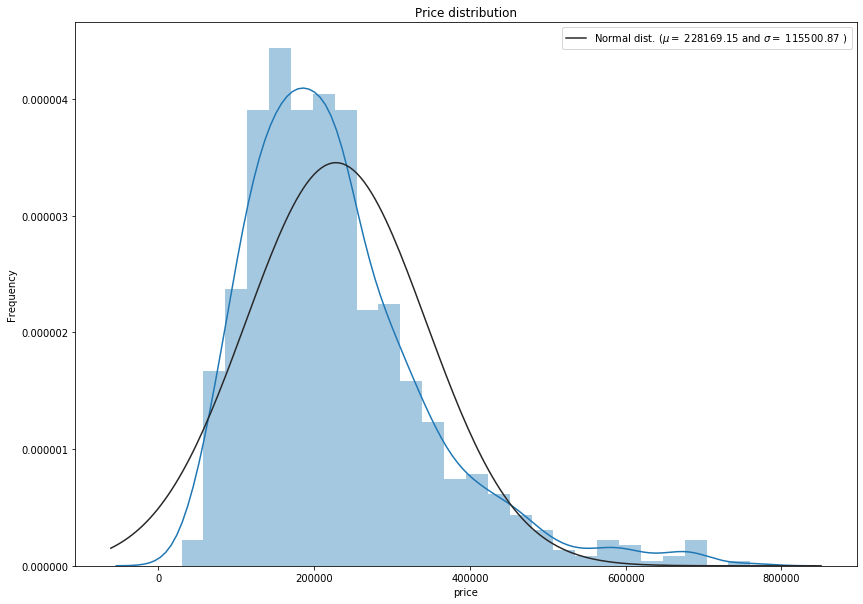

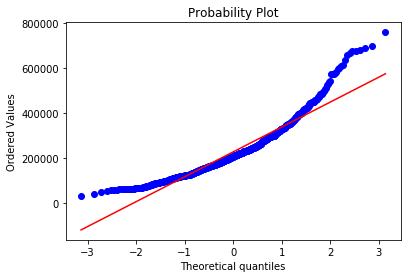

Skewness: 1.325834
Kurtosis: 2.437189


In [25]:
plt.subplots(figsize=(14,10))
sns.distplot(df['price'] , fit=norm);

(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

##Rozkład zmiennej zależnej 'price' jest rozkładem o asymetrii prawostronnej

In [26]:
#normalizacja danych ['price']
df['price'] = np.log1p(df['price'])


 mu = 12.22 and sigma = 0.50



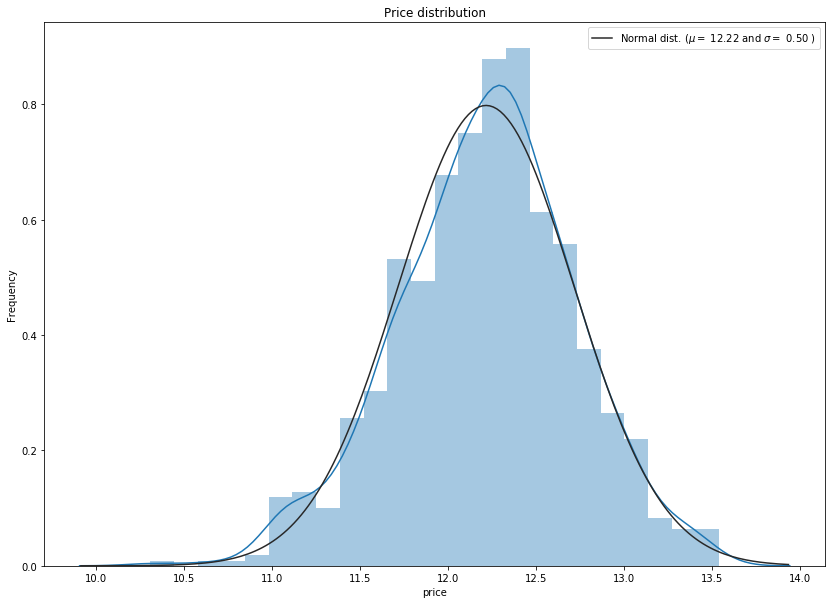

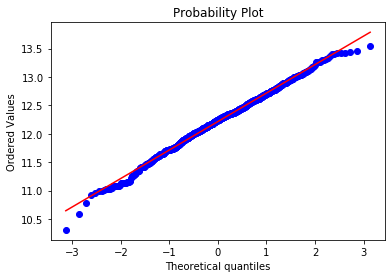

Skewness: -0.209260
Kurtosis: 0.167496


In [27]:
plt.subplots(figsize=(14,10))
sns.distplot(df['price'] , fit=norm);

(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

#po normalizacji występuje rozkład normalny

In [28]:
#określenie najbradziej skorelowanych zmiennych z ceną
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()['price']
golden_features_list = df_num_corr[abs(df_num_corr) > 0.2].sort_values(ascending=False)
print("To {} najbardziej skorelowanych zmiennych z ceną:\n{}".format(len(golden_features_list), golden_features_list))

To 6 najbardziej skorelowanych zmiennych z ceną:
price        1.000000
sq__ft       0.701340
baths        0.527517
beds         0.479950
longitude    0.256211
zip         -0.231404
Name: price, dtype: float64


In [29]:
#df = pd.get_dummies(df, columns=['beds', 'baths', 'type']) 

### 3. Modele

In [32]:
#określenie zmiennych X, y
X = df.drop(["price", "state", "sale_date", "street"],axis=1)
y = df["price"]

In [33]:
#podział danych na treningowe i testowe 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 0)

In [34]:
#skalowanie danych 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,31,95838,CA,2,1,836,2,Wed May 21 00:00:00 EDT 2008,10.989065,38.631913,-121.434879
1,51 OMAHA CT,31,95823,CA,3,1,1167,2,Wed May 21 00:00:00 EDT 2008,11.130390,38.478902,-121.431028
2,2796 BRANCH ST,31,95815,CA,2,1,796,2,Wed May 21 00:00:00 EDT 2008,11.140136,38.618305,-121.443839
3,2805 JANETTE WAY,31,95815,CA,2,1,852,2,Wed May 21 00:00:00 EDT 2008,11.146316,38.616835,-121.439146
4,6001 MCMAHON DR,31,95824,CA,2,1,797,2,Wed May 21 00:00:00 EDT 2008,11.313266,38.519470,-121.435768


#### 3.1 Random Forrest 

In [36]:
#parametryzacja przy użyciu GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [100, 150, 200, 250, 300, 350],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}

In [37]:
regressor = RandomForestRegressor(max_depth= 8, max_features= 'sqrt', n_estimators= 300)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [38]:
y_pred = regressor.predict(X_test)

In [39]:
R2 = regressor.score(X_test, y_test)
print(R2*100)

58.82149252890325


In [40]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2385677877988065
Mean Squared Error: 0.09936782400959199
Root Mean Squared Error: 0.315226623256336


In [41]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
df1= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1.head(11)

,Actual,Predicted
0,12.402876,12.513558
1,12.111767,12.399405
2,12.093805,12.232123
3,13.122365,12.576629
4,11.767575,11.949588
5,11.596816,11.736738
6,12.709877,12.691906
7,11.082158,11.682846
8,12.584513,12.538018
9,12.183321,12.135647


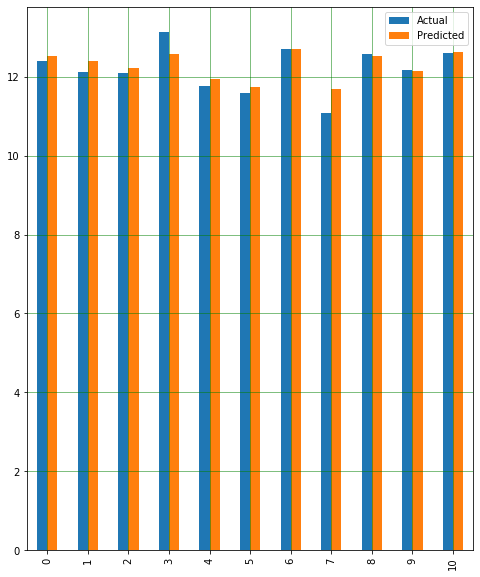

In [42]:
df1 = df1.head(11)
df1.plot(kind='bar',figsize=(8,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### 3.2 Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_pred = regressor.predict(X_test)

In [58]:
R2 = regressor.score(X_test, y_test)
print(R2*100)

53.44775470848278


In [37]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.25671932499775085
Mean Squared Error: 0.11233518651995077
Root Mean Squared Error: 0.3351644171447064


In [38]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
df= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(11)

,Actual,Predicted
0,12.402876,12.233893
1,12.111767,12.254796
2,12.093805,12.227409
3,13.122365,12.586857
4,11.767575,11.876736
5,11.596816,11.956612
6,12.709877,12.750814
7,11.082158,11.894652
8,12.584513,12.388643
9,12.183321,12.213168


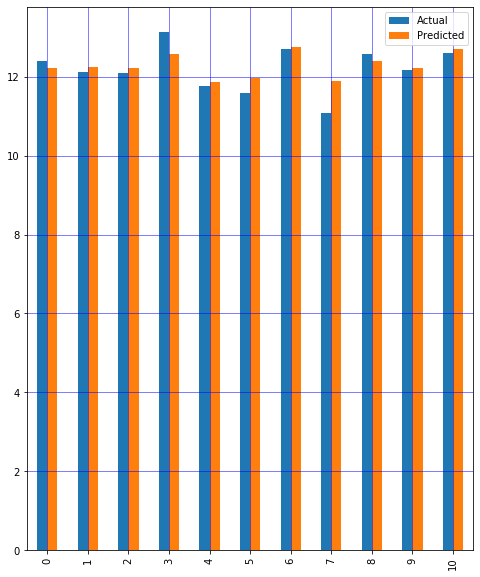

In [39]:
df1 = df.head(11)
df1.plot(kind='bar',figsize=(8,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### 3.3 XGBoost 

In [43]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

print ('Select Model...')
XGBRegressor = XGBRegressor() 
parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4], 
              'min_child_weight':[4,5], 
              'gamma':[0, 0.1, 0.2, 0.3],  
              'subsample':[0.7, 0.8, 0.9, 1],
              'colsample_bytree':[0.8, 0.9, 1], 
              'max_depth': [3,4,5,6], 
              'n_estimators': [120, 100, 140] }

grid_search = GridSearchCV(estimator=XGBRegressor, param_grid=parameters, cv=5, n_jobs=-1)
print("parameters:")
grid_search.fit(X_train, y_train)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Select Model...
parameters:


C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Sony\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:18:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best score: 0.652
Best parameters set:
	colsample_bytree: 0.9
	gamma: 0.2
	learning_rate: 0.1
	max_depth: 5
	min_child_weight: 5
	n_estimators: 120
	subsample: 0.8


In [43]:
from xgboost import XGBRegressor
model = XGBRegressor(colsample_bytree = 0.9, gamma = 0.2, learning_rate = 0.1, max_depth = 5,
                     min_child_weight = 5, n_estimators = 120, subsample = 0.8)
model.fit(X_train, y_train)

C:\Users\Sony\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:27:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0.2,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=5, missing=None, n_estimators=120,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [44]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [45]:
model.score(X_test, y_test)

0.6178540662382521

In [46]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.22518273448317272
Mean Squared Error: 0.09221560523695976
Root Mean Squared Error: 0.3036702244820189


In [47]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
df= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(11)

,Actual,Predicted
0,12.402876,12.486040
1,12.111767,12.391841
2,12.093805,12.258042
3,13.122365,12.801980
4,11.767575,12.034189
5,11.596816,11.714869
6,12.709877,12.726044
7,11.082158,11.839382
8,12.584513,12.615111
9,12.183321,12.229602


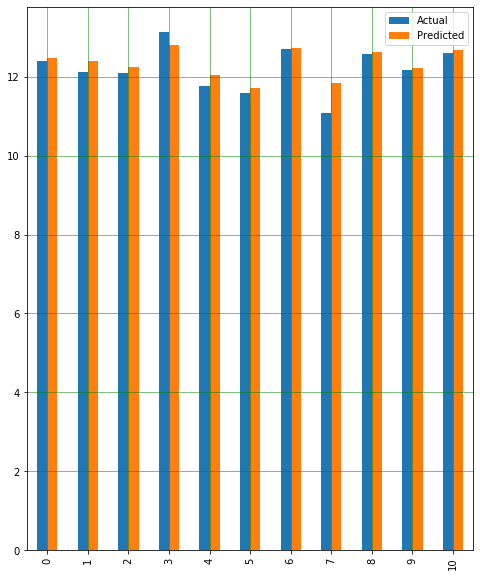

In [48]:
df1 = df.head(11)
df1.plot(kind='bar',figsize=(8,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### 3.4 Model Deep Learning

In [49]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


In [50]:
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [52]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=50,  verbose=1, validation_split=0.2)


Train on 388 samples, validate on 98 samples
Epoch 1/1000
388/388 [==============================] - 0s 453us/step - loss: 145.9969 - mae: 12.0751 - val_loss: 145.6619 - val_mae: 12.0594
Epoch 2/1000
388/388 [==============================] - 0s 36us/step - loss: 144.7292 - mae: 12.0229 - val_loss: 144.3746 - val_mae: 12.0062
Epoch 3/1000
388/388 [==============================] - 0s 41us/step - loss: 143.3544 - mae: 11.9659 - val_loss: 142.9756 - val_mae: 11.9480
Epoch 4/1000
388/388 [==============================] - 0s 41us/step - loss: 141.8676 - mae: 11.9039 - val_loss: 141.4223 - val_mae: 11.8830
Epoch 5/1000
388/388 [==============================] - 0s 44us/step - loss: 140.2213 - mae: 11.8346 - val_loss: 139.6923 - val_mae: 11.8100
Epoch 6/1000
388/388 [==============================] - 0s 41us/step - loss: 138.4030 - mae: 11.7575 - val_loss: 137.7554 - val_mae: 11.7274
Epoch 7/1000
388/388 [==============================] - 0s 52us/step - loss: 136.3477 - mae: 11.6692 - val_

388/388 [==============================] - 0s 52us/step - loss: 3.7349 - mae: 1.4638 - val_loss: 4.7617 - val_mae: 1.6483
Epoch 59/1000
388/388 [==============================] - 0s 49us/step - loss: 3.6452 - mae: 1.4431 - val_loss: 4.6939 - val_mae: 1.6364
Epoch 60/1000
388/388 [==============================] - 0s 46us/step - loss: 3.5556 - mae: 1.4213 - val_loss: 4.6206 - val_mae: 1.6217
Epoch 61/1000
388/388 [==============================] - 0s 49us/step - loss: 3.4687 - mae: 1.4017 - val_loss: 4.5495 - val_mae: 1.6075
Epoch 62/1000
388/388 [==============================] - 0s 49us/step - loss: 3.3860 - mae: 1.3834 - val_loss: 4.4805 - val_mae: 1.5939
Epoch 63/1000
388/388 [==============================] - 0s 49us/step - loss: 3.3092 - mae: 1.3664 - val_loss: 4.4141 - val_mae: 1.5805
Epoch 64/1000
388/388 [==============================] - 0s 49us/step - loss: 3.2310 - mae: 1.3499 - val_loss: 4.3579 - val_mae: 1.5695
Epoch 65/1000
388/388 [==============================] - 0s 52

Epoch 118/1000
388/388 [==============================] - 0s 52us/step - loss: 1.2529 - mae: 0.8655 - val_loss: 1.9720 - val_mae: 1.0028
Epoch 119/1000
388/388 [==============================] - 0s 49us/step - loss: 1.2305 - mae: 0.8587 - val_loss: 1.9415 - val_mae: 0.9937
Epoch 120/1000
388/388 [==============================] - 0s 41us/step - loss: 1.2106 - mae: 0.8526 - val_loss: 1.9117 - val_mae: 0.9850
Epoch 121/1000
388/388 [==============================] - 0s 41us/step - loss: 1.1907 - mae: 0.8461 - val_loss: 1.8808 - val_mae: 0.9752
Epoch 122/1000
388/388 [==============================] - 0s 41us/step - loss: 1.1656 - mae: 0.8384 - val_loss: 1.8454 - val_mae: 0.9649
Epoch 123/1000
388/388 [==============================] - 0s 41us/step - loss: 1.1463 - mae: 0.8312 - val_loss: 1.8134 - val_mae: 0.9564
Epoch 124/1000
388/388 [==============================] - 0s 44us/step - loss: 1.1266 - mae: 0.8241 - val_loss: 1.7843 - val_mae: 0.9491
Epoch 125/1000
388/388 [=================

Epoch 178/1000
388/388 [==============================] - 0s 44us/step - loss: 0.4778 - mae: 0.5395 - val_loss: 0.8173 - val_mae: 0.6376
Epoch 179/1000
388/388 [==============================] - 0s 46us/step - loss: 0.4700 - mae: 0.5353 - val_loss: 0.8018 - val_mae: 0.6290
Epoch 180/1000
388/388 [==============================] - 0s 49us/step - loss: 0.4613 - mae: 0.5300 - val_loss: 0.7928 - val_mae: 0.6273
Epoch 181/1000
388/388 [==============================] - 0s 46us/step - loss: 0.4523 - mae: 0.5246 - val_loss: 0.7790 - val_mae: 0.6224
Epoch 182/1000
388/388 [==============================] - 0s 49us/step - loss: 0.4427 - mae: 0.5188 - val_loss: 0.7649 - val_mae: 0.6160
Epoch 183/1000
388/388 [==============================] - 0s 57us/step - loss: 0.4341 - mae: 0.5129 - val_loss: 0.7484 - val_mae: 0.6093
Epoch 184/1000
388/388 [==============================] - 0s 62us/step - loss: 0.4243 - mae: 0.5060 - val_loss: 0.7386 - val_mae: 0.6063
Epoch 185/1000
388/388 [=================

388/388 [==============================] - 0s 49us/step - loss: 0.2135 - mae: 0.3543 - val_loss: 0.3906 - val_mae: 0.4668
Epoch 238/1000
388/388 [==============================] - 0s 41us/step - loss: 0.2113 - mae: 0.3527 - val_loss: 0.3879 - val_mae: 0.4657
Epoch 239/1000
388/388 [==============================] - 0s 36us/step - loss: 0.2100 - mae: 0.3511 - val_loss: 0.3842 - val_mae: 0.4635
Epoch 240/1000
388/388 [==============================] - 0s 44us/step - loss: 0.2079 - mae: 0.3494 - val_loss: 0.3819 - val_mae: 0.4617
Epoch 241/1000
388/388 [==============================] - 0s 41us/step - loss: 0.2069 - mae: 0.3490 - val_loss: 0.3787 - val_mae: 0.4586
Epoch 242/1000
388/388 [==============================] - 0s 49us/step - loss: 0.2057 - mae: 0.3480 - val_loss: 0.3761 - val_mae: 0.4580
Epoch 243/1000
388/388 [==============================] - 0s 39us/step - loss: 0.2039 - mae: 0.3472 - val_loss: 0.3732 - val_mae: 0.4560
Epoch 244/1000
388/388 [==============================] 

Epoch 297/1000
388/388 [==============================] - 0s 36us/step - loss: 0.1570 - mae: 0.3094 - val_loss: 0.2885 - val_mae: 0.4005
Epoch 298/1000
388/388 [==============================] - 0s 39us/step - loss: 0.1563 - mae: 0.3089 - val_loss: 0.2884 - val_mae: 0.4004
Epoch 299/1000
388/388 [==============================] - 0s 41us/step - loss: 0.1560 - mae: 0.3083 - val_loss: 0.2878 - val_mae: 0.4002
Epoch 300/1000
388/388 [==============================] - 0s 46us/step - loss: 0.1553 - mae: 0.3078 - val_loss: 0.2871 - val_mae: 0.3985
Epoch 301/1000
388/388 [==============================] - 0s 36us/step - loss: 0.1549 - mae: 0.3073 - val_loss: 0.2853 - val_mae: 0.3963
Epoch 302/1000
388/388 [==============================] - 0s 39us/step - loss: 0.1542 - mae: 0.3061 - val_loss: 0.2840 - val_mae: 0.3982
Epoch 303/1000
388/388 [==============================] - 0s 39us/step - loss: 0.1531 - mae: 0.3062 - val_loss: 0.2837 - val_mae: 0.3980
Epoch 304/1000
388/388 [=================

Epoch 357/1000
388/388 [==============================] - 0s 44us/step - loss: 0.1311 - mae: 0.2832 - val_loss: 0.2517 - val_mae: 0.3665
Epoch 358/1000
388/388 [==============================] - 0s 41us/step - loss: 0.1300 - mae: 0.2823 - val_loss: 0.2524 - val_mae: 0.3672
Epoch 359/1000
388/388 [==============================] - 0s 44us/step - loss: 0.1300 - mae: 0.2823 - val_loss: 0.2516 - val_mae: 0.3668
Epoch 360/1000
388/388 [==============================] - 0s 41us/step - loss: 0.1296 - mae: 0.2821 - val_loss: 0.2512 - val_mae: 0.3672
Epoch 361/1000
388/388 [==============================] - 0s 41us/step - loss: 0.1290 - mae: 0.2816 - val_loss: 0.2503 - val_mae: 0.3658
Epoch 362/1000
388/388 [==============================] - 0s 41us/step - loss: 0.1284 - mae: 0.2805 - val_loss: 0.2496 - val_mae: 0.3646
Epoch 363/1000
388/388 [==============================] - 0s 46us/step - loss: 0.1284 - mae: 0.2802 - val_loss: 0.2494 - val_mae: 0.3653
Epoch 364/1000
388/388 [=================

Epoch 417/1000
388/388 [==============================] - 0s 52us/step - loss: 0.1142 - mae: 0.2659 - val_loss: 0.2229 - val_mae: 0.3358
Epoch 418/1000
388/388 [==============================] - 0s 44us/step - loss: 0.1116 - mae: 0.2630 - val_loss: 0.2270 - val_mae: 0.3397
Epoch 419/1000
388/388 [==============================] - 0s 41us/step - loss: 0.1120 - mae: 0.2635 - val_loss: 0.2253 - val_mae: 0.3393
Epoch 420/1000
388/388 [==============================] - 0s 44us/step - loss: 0.1110 - mae: 0.2625 - val_loss: 0.2242 - val_mae: 0.3382
Epoch 421/1000
388/388 [==============================] - 0s 44us/step - loss: 0.1111 - mae: 0.2633 - val_loss: 0.2239 - val_mae: 0.3395
Epoch 422/1000
388/388 [==============================] - 0s 41us/step - loss: 0.1106 - mae: 0.2627 - val_loss: 0.2241 - val_mae: 0.3374
Epoch 423/1000
388/388 [==============================] - 0s 44us/step - loss: 0.1103 - mae: 0.2621 - val_loss: 0.2227 - val_mae: 0.3363
Epoch 424/1000
388/388 [=================

Epoch 477/1000
388/388 [==============================] - 0s 41us/step - loss: 0.1006 - mae: 0.2505 - val_loss: 0.2058 - val_mae: 0.3227
Epoch 478/1000
388/388 [==============================] - 0s 39us/step - loss: 0.1003 - mae: 0.2503 - val_loss: 0.2072 - val_mae: 0.3254
Epoch 479/1000
388/388 [==============================] - 0s 41us/step - loss: 0.1013 - mae: 0.2508 - val_loss: 0.2074 - val_mae: 0.3222
Epoch 480/1000
388/388 [==============================] - 0s 36us/step - loss: 0.1001 - mae: 0.2491 - val_loss: 0.2063 - val_mae: 0.3241
Epoch 481/1000
388/388 [==============================] - 0s 41us/step - loss: 0.1001 - mae: 0.2497 - val_loss: 0.2067 - val_mae: 0.3235
Epoch 482/1000
388/388 [==============================] - 0s 41us/step - loss: 0.0998 - mae: 0.2496 - val_loss: 0.2055 - val_mae: 0.3223
Epoch 483/1000
388/388 [==============================] - 0s 39us/step - loss: 0.1003 - mae: 0.2497 - val_loss: 0.2064 - val_mae: 0.3234
Epoch 484/1000
388/388 [=================

Epoch 537/1000
388/388 [==============================] - 0s 41us/step - loss: 0.0958 - mae: 0.2429 - val_loss: 0.1984 - val_mae: 0.3095
Epoch 538/1000
388/388 [==============================] - 0s 44us/step - loss: 0.0945 - mae: 0.2406 - val_loss: 0.1990 - val_mae: 0.3128
Epoch 539/1000
388/388 [==============================] - 0s 44us/step - loss: 0.0950 - mae: 0.2428 - val_loss: 0.1997 - val_mae: 0.3154
Epoch 540/1000
388/388 [==============================] - 0s 41us/step - loss: 0.0956 - mae: 0.2425 - val_loss: 0.1988 - val_mae: 0.3116
Epoch 541/1000
388/388 [==============================] - 0s 39us/step - loss: 0.0966 - mae: 0.2429 - val_loss: 0.1955 - val_mae: 0.3089
Epoch 542/1000
388/388 [==============================] - 0s 39us/step - loss: 0.0959 - mae: 0.2436 - val_loss: 0.2013 - val_mae: 0.3186
Epoch 543/1000
388/388 [==============================] - 0s 41us/step - loss: 0.0953 - mae: 0.2427 - val_loss: 0.1946 - val_mae: 0.3071
Epoch 544/1000
388/388 [=================

Epoch 597/1000
388/388 [==============================] - 0s 57us/step - loss: 0.0921 - mae: 0.2376 - val_loss: 0.1920 - val_mae: 0.3086
Epoch 598/1000
388/388 [==============================] - 0s 54us/step - loss: 0.0926 - mae: 0.2391 - val_loss: 0.1964 - val_mae: 0.3108
Epoch 599/1000
388/388 [==============================] - 0s 44us/step - loss: 0.0908 - mae: 0.2354 - val_loss: 0.1929 - val_mae: 0.3078
Epoch 600/1000
388/388 [==============================] - 0s 46us/step - loss: 0.0911 - mae: 0.2358 - val_loss: 0.1927 - val_mae: 0.3082
Epoch 601/1000
388/388 [==============================] - 0s 44us/step - loss: 0.0914 - mae: 0.2359 - val_loss: 0.1941 - val_mae: 0.3096
Epoch 602/1000
388/388 [==============================] - 0s 39us/step - loss: 0.0921 - mae: 0.2376 - val_loss: 0.1962 - val_mae: 0.3096
Epoch 603/1000
388/388 [==============================] - ETA: 0s - loss: 0.0694 - mae: 0.207 - 0s 41us/step - loss: 0.0925 - mae: 0.2379 - val_loss: 0.1931 - val_mae: 0.3088
Epo

388/388 [==============================] - 0s 44us/step - loss: 0.0888 - mae: 0.2319 - val_loss: 0.1962 - val_mae: 0.3117
Epoch 657/1000
388/388 [==============================] - 0s 44us/step - loss: 0.0897 - mae: 0.2336 - val_loss: 0.1981 - val_mae: 0.3132
Epoch 658/1000
388/388 [==============================] - 0s 44us/step - loss: 0.0890 - mae: 0.2320 - val_loss: 0.1952 - val_mae: 0.3076
Epoch 659/1000
388/388 [==============================] - 0s 44us/step - loss: 0.0889 - mae: 0.2318 - val_loss: 0.1998 - val_mae: 0.3130
Epoch 660/1000
388/388 [==============================] - 0s 44us/step - loss: 0.0887 - mae: 0.2320 - val_loss: 0.1942 - val_mae: 0.3079
Epoch 661/1000
388/388 [==============================] - 0s 39us/step - loss: 0.0889 - mae: 0.2321 - val_loss: 0.1984 - val_mae: 0.3121
Epoch 662/1000
388/388 [==============================] - 0s 41us/step - loss: 0.0892 - mae: 0.2328 - val_loss: 0.1962 - val_mae: 0.3095
Epoch 663/1000
388/388 [==============================] 

388/388 [==============================] - 0s 41us/step - loss: 0.0891 - mae: 0.2318 - val_loss: 0.1964 - val_mae: 0.3109
Epoch 716/1000
388/388 [==============================] - 0s 44us/step - loss: 0.0890 - mae: 0.2319 - val_loss: 0.2008 - val_mae: 0.3102
Epoch 717/1000
388/388 [==============================] - 0s 41us/step - loss: 0.0888 - mae: 0.2313 - val_loss: 0.1927 - val_mae: 0.3082
Epoch 718/1000
388/388 [==============================] - 0s 41us/step - loss: 0.0884 - mae: 0.2313 - val_loss: 0.1960 - val_mae: 0.3102
Epoch 719/1000
388/388 [==============================] - 0s 44us/step - loss: 0.0881 - mae: 0.2306 - val_loss: 0.1966 - val_mae: 0.3100
Epoch 720/1000
388/388 [==============================] - 0s 41us/step - loss: 0.0883 - mae: 0.2306 - val_loss: 0.1952 - val_mae: 0.3079
Epoch 721/1000
388/388 [==============================] - 0s 41us/step - loss: 0.0882 - mae: 0.2313 - val_loss: 0.1954 - val_mae: 0.3099
Epoch 722/1000
388/388 [==============================] 

Epoch 775/1000
388/388 [==============================] - 0s 54us/step - loss: 0.0874 - mae: 0.2293 - val_loss: 0.1984 - val_mae: 0.3131
Epoch 776/1000
388/388 [==============================] - 0s 52us/step - loss: 0.0875 - mae: 0.2294 - val_loss: 0.1965 - val_mae: 0.3108
Epoch 777/1000
388/388 [==============================] - 0s 41us/step - loss: 0.0882 - mae: 0.2302 - val_loss: 0.1974 - val_mae: 0.3090
Epoch 778/1000
388/388 [==============================] - 0s 46us/step - loss: 0.0879 - mae: 0.2313 - val_loss: 0.1984 - val_mae: 0.3156
Epoch 779/1000
388/388 [==============================] - 0s 39us/step - loss: 0.0884 - mae: 0.2302 - val_loss: 0.1976 - val_mae: 0.3098
Epoch 780/1000
388/388 [==============================] - 0s 44us/step - loss: 0.0880 - mae: 0.2298 - val_loss: 0.1946 - val_mae: 0.3093
Epoch 781/1000
388/388 [==============================] - 0s 36us/step - loss: 0.0870 - mae: 0.2284 - val_loss: 0.1966 - val_mae: 0.3091
Epoch 782/1000
388/388 [=================

Epoch 835/1000
388/388 [==============================] - 0s 41us/step - loss: 0.0872 - mae: 0.2292 - val_loss: 0.1978 - val_mae: 0.3108
Epoch 836/1000
388/388 [==============================] - 0s 41us/step - loss: 0.0869 - mae: 0.2287 - val_loss: 0.1997 - val_mae: 0.3127
Epoch 837/1000
388/388 [==============================] - 0s 36us/step - loss: 0.0867 - mae: 0.2290 - val_loss: 0.1982 - val_mae: 0.3129
Epoch 838/1000
388/388 [==============================] - 0s 44us/step - loss: 0.0874 - mae: 0.2298 - val_loss: 0.1937 - val_mae: 0.3082
Epoch 839/1000
388/388 [==============================] - 0s 41us/step - loss: 0.0869 - mae: 0.2290 - val_loss: 0.2013 - val_mae: 0.3151
Epoch 840/1000
388/388 [==============================] - 0s 44us/step - loss: 0.0868 - mae: 0.2284 - val_loss: 0.1935 - val_mae: 0.3081
Epoch 841/1000
388/388 [==============================] - 0s 39us/step - loss: 0.0870 - mae: 0.2279 - val_loss: 0.1979 - val_mae: 0.3093
Epoch 842/1000
388/388 [=================

Epoch 895/1000
388/388 [==============================] - 0s 39us/step - loss: 0.0864 - mae: 0.2273 - val_loss: 0.1995 - val_mae: 0.3145
Epoch 896/1000
388/388 [==============================] - 0s 41us/step - loss: 0.0883 - mae: 0.2291 - val_loss: 0.1950 - val_mae: 0.3101
Epoch 897/1000
388/388 [==============================] - 0s 46us/step - loss: 0.0884 - mae: 0.2299 - val_loss: 0.2031 - val_mae: 0.3123
Epoch 898/1000
388/388 [==============================] - 0s 46us/step - loss: 0.0857 - mae: 0.2268 - val_loss: 0.1961 - val_mae: 0.3123
Epoch 899/1000
388/388 [==============================] - 0s 44us/step - loss: 0.0868 - mae: 0.2281 - val_loss: 0.1982 - val_mae: 0.3111
Epoch 900/1000
388/388 [==============================] - 0s 39us/step - loss: 0.0858 - mae: 0.2269 - val_loss: 0.1998 - val_mae: 0.3111
Epoch 901/1000
388/388 [==============================] - 0s 44us/step - loss: 0.0867 - mae: 0.2279 - val_loss: 0.1977 - val_mae: 0.3118
Epoch 902/1000
388/388 [=================

388/388 [==============================] - 0s 41us/step - loss: 0.0857 - mae: 0.2255 - val_loss: 0.1991 - val_mae: 0.3154
Epoch 955/1000
388/388 [==============================] - 0s 44us/step - loss: 0.0864 - mae: 0.2274 - val_loss: 0.2021 - val_mae: 0.3144
Epoch 956/1000
388/388 [==============================] - 0s 44us/step - loss: 0.0872 - mae: 0.2290 - val_loss: 0.2026 - val_mae: 0.3155
Epoch 957/1000
388/388 [==============================] - 0s 49us/step - loss: 0.0876 - mae: 0.2296 - val_loss: 0.1980 - val_mae: 0.3131
Epoch 958/1000
388/388 [==============================] - 0s 52us/step - loss: 0.0866 - mae: 0.2281 - val_loss: 0.1984 - val_mae: 0.3113
Epoch 959/1000
388/388 [==============================] - 0s 57us/step - loss: 0.0862 - mae: 0.2272 - val_loss: 0.1989 - val_mae: 0.3148
Epoch 960/1000
388/388 [==============================] - 0s 46us/step - loss: 0.0864 - mae: 0.2280 - val_loss: 0.2013 - val_mae: 0.3133
Epoch 961/1000
388/388 [==============================] 

In [53]:
model.evaluate(X_test, y_test)

325/325 [==============================] - 0s 28us/step


[0.15381260305643082, 0.2841789722442627]

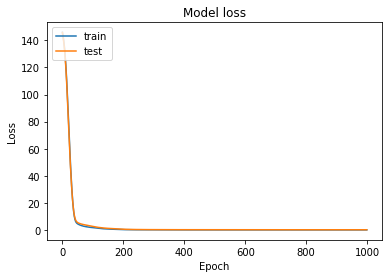

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 4. Wybór modelu

#### Po wykonaniu modeli takich jak: Random Forrest, Linear Regression, Xgboost oraz model deep learningowy i przeanalizowaniu ich skuteczności można stwierdzić, że najlepszym, do rozwiązania naszego problemu byłby model Xgboost, który osiąga najlepszy wynik. Ze względu na to, że do analizy mieliśmy stosunkowo mało danych, uważam że model deep learningowy nie jest odpowiednim do tego narzędziem. 